In [1]:
# imports here
import numpy as np
import matplotlib.pyplot as plt
import time
from copy import deepcopy


In [2]:
# Test Function
def sphere_function(x):
    ##return sum((x**2 - 2*x - 4) ** 2)
    return sum(x**2)

In [3]:
# Problem to be defined here as a class (or struct)

class problem:
    
    def __init__(self):
    # Cost function
        self.cost_function = sphere_function
    # number of genes (variables) in an individial
        self.number_of_genes = 5

    #  Max gene value
        self.maximum_value = 10
    # Min Gene Value
        self.minimum_value = -10


In [4]:
#Genetic Algorithm Parameters here as a class or struct
class parameters():
    def __init__(self):
        

# Number of iterations of genetic algorithm
        self.number_of_iterations = 100
# Number of individuals in Population 
        self.number_in_population = 50
    
# Rate of new children pre iteration
        self.child_rate = 1
# Number of children 
        self.number_of_children = self.number_in_population * self.child_rate
# Exploration Rate (Gamma)
        self.explore_rate = 0.1
    
# Mutation Rate (Probability that a given gene will be mutated)
        self.mutation_rate = 0.2
# Mutation Range (Determines the amount of change of an individual gene)
        self.mutation_range = 0.2


    def to_String(self):
        return ("Population: {}  Child Rate: {}  Explore Rate: {}  Mutation Rate: {}  Mutation Range: {}"
                .format(self.number_in_population, self.child_rate, self.explore_rate, self.mutation_rate, self.mutation_range))



In [5]:
# Structure for an individual of the population as a class or struct
class individual:
    

# Genotype or Chromosone
    chromosone = None
# Cost for the individual
    cost = 0
# Constructor(s)

    # if problem is passed as parameter to constructor, a random individual is generated
    #   https://docs.python.org/3/glossary.html#term-argument
    def __init__(self, problem = None):
        
        if problem is not None:
            self.chromosone = np.random.uniform(problem.minimum_value,problem.maximum_value,problem.number_of_genes)
            self.cost = problem.cost_function(self.chromosone)
# Crossover with another individual  method
    def crossover(self, other_individual, explore_rate):
        child1 = deepcopy(self)
        child2 = deepcopy(other_individual)
        alpha = np.random.uniform(-explore_rate, 1+explore_rate, child1.chromosone.shape)
        child1.chromosone = alpha*self.chromosone + (1-alpha) * other_individual.chromosone
        child2.chromosone = alpha*other_individual.chromosone + (1-alpha) * self.chromosone
        return child1, child2
        
# Mutate method
    def mutate(self, rate, range_of_change):
        for i in range(len(self.chromosone)):
            if np.random.rand() < rate:
                self.chromosone[i] += np.random.randn() * range_of_change


In [6]:
def choose_distinct_pair_from(population_size):
    index1 = np.random.randint(population_size)
    index2 = np.random.randint(population_size)
    if index1 == index2:
        return choose_distinct_pair_from(population_size)
    else:
        return index1, index2

In [7]:
# Main Genetic method

def run_genetic (problem, parameters, max_error = 0):
    
    #  read problem
    cost_function = problem.cost_function
    
    # read parameters
    number_in_population = parameters.number_in_population
    number_of_iterations = parameters.number_of_iterations
    number_of_children = parameters.number_of_children
    explore_rate = parameters.explore_rate
    mutation_rate = parameters.mutation_rate
    mutation_range = parameters.mutation_range
    
    
    # placeholder for best solution
    best_solution = deepcopy(individual())
    best_solution.cost = np.infty
    
    # placeholder for best cost at each iteration
    #best_costs = []
    
    population = []
    #  initialize population for the above problem, i.e. generate random individuals 
    for i in range(number_in_population):
        new_individual = individual(problem)
        population.append(new_individual)
        if new_individual.cost < best_solution.cost:
            best_solution = deepcopy(new_individual)
        
    
     # Main Loop for algorithm   (number of iterations)
    
    for iteration in range(number_of_iterations):
        
        # generate a new population of children
        children = []
        
        # How many children? 
        while len(children) < number_of_children:
                
                # Select 2 Parents
                parent1_index, parent2_index = choose_distinct_pair_from(number_in_population)
                parent1 = population[parent1_index]
                parent2 = population[parent2_index]
                
                # Use crossover to produce 2 children
                child1, child2 = parent1.crossover(parent2, explore_rate)
                # Mutate these children
                child1.mutate(mutation_rate, mutation_range)
                child2.mutate(mutation_rate, mutation_range)
                # calculate costs for these children
                child1.cost = cost_function(child1.chromosone)
                child2.cost = cost_function(child2.chromosone)
                
                # add to the children population of new children
                children.append(child1)
                children.append(child2)
                
        # Merge parent and child population
        population += children
        
        # Sort into ascending order for cost
        population = sorted(population, key = lambda x: x.cost)
        
        # Select population next iteration
        population = population[0:number_in_population]
        
        # Update best solution
        if population[0].cost < best_solution.cost:
            best_solution = deepcopy(population[0])
        
        # print iteration results
        #print("Iteration {} Cost {}".format(iteration, best_solution.cost))
        
        #output results ?? class/struct/ best solution/ population?
        #best_costs.append(best_solution.cost)
        
        if best_solution.cost < max_error:
            #print("Stopped at iteration: {}".format(iteration))
            break
    
    #print("Ended at iteration: {}".format(iteration))
                
    #plt.plot(best_costs)
    #plt.semilogy(best_costs)
    #plt.xlabel("Iteration")
    #plt.ylabel("Best Cost")
    #plt.title("Genetic Algorithm \n {}".format(parameters.to_String()))
    return population, best_solution
        
    
    
    
    
    
    

In [8]:
prob = problem()

In [9]:
pars = parameters()

In [10]:
final_pop, best_solution = run_genetic(prob, pars)

In [11]:
def test_genetic(number_of_runs, problem, parameters, max_error):
    start_time = time.perf_counter()
    for i in range(number_of_runs):
        run_genetic(problem, parameters, max_error)
    return(time.perf_counter() - start_time)

In [12]:
initial_value = test_genetic(100, prob, pars, 0.000001)

In [13]:
print(initial_value)

11.621910999999999


# Parameter tests, each test is run 10 times

## Explore Rate Tests:

In [14]:
def test_explore(range_start, range_end, explore_range = 1, range_steps = 1):
    best_explore_rate = 100000
    best_time = 100.00
    for i in range(range_start, range_end, range_steps):
        current_explore = float(i)/float(explore_range)
        pars.explore_rate = current_explore
        current_time = test_genetic(100, prob, pars, 0.00001)
        if(current_time < best_time):
            best_explore_rate = current_explore
            best_time = current_time
        print("Explore Rate: {} Time: {}".format(current_explore, current_time))
        pars.explore_rate = 0.3
    return best_explore_rate, best_time

In [15]:
def get_best_explore(range_start, range_end, explore_range = 1, range_steps = 1, number_of_iterations = 10):
    times_for_explore_rate = []
    explore_rates = []
    for i in range(number_of_iterations):
        print("iteration: {}".format(i))
        current_explore, current_time = test_explore(range_start, range_end, explore_range, range_steps)
        explore_rates.append(current_explore)
        times_for_explore_rate.append(current_time)
        print("Explore Rate: {}".format(current_explore))
        print("Time: {}".format(times_for_explore_rate[i]))
        print()
    plt.plot(explore_rates)
    plt.xlabel("Iteration")
    plt.ylabel("Explore Rate")

### First Test gets range of explore rate from 0 to 100 in steps of 10 (Result of 0.0)

iteration: 0
Explore Rate: 0.0 Time: 8.8634014
Explore Rate: 10.0 Time: 13.6954132
Explore Rate: 20.0 Time: 11.742695500000004
Explore Rate: 30.0 Time: 11.723428899999995
Explore Rate: 40.0 Time: 11.861317700000008
Explore Rate: 50.0 Time: 11.856198599999999
Explore Rate: 60.0 Time: 11.856199199999992
Explore Rate: 70.0 Time: 11.666646900000003
Explore Rate: 80.0 Time: 11.688439400000007
Explore Rate: 90.0 Time: 11.638591399999981
Explore Rate: 0.0
Time: 8.8634014

iteration: 1
Explore Rate: 0.0 Time: 7.101301100000001
Explore Rate: 10.0 Time: 11.933659699999993
Explore Rate: 20.0 Time: 11.606995299999994
Explore Rate: 30.0 Time: 11.714102300000008
Explore Rate: 40.0 Time: 11.74840690000002
Explore Rate: 50.0 Time: 11.8735073
Explore Rate: 60.0 Time: 11.768195700000007
Explore Rate: 70.0 Time: 11.96415780000001
Explore Rate: 80.0 Time: 11.690399799999994
Explore Rate: 90.0 Time: 11.749814499999985
Explore Rate: 0.0
Time: 7.101301100000001

iteration: 2
Explore Rate: 0.0 Time: 6.1033269

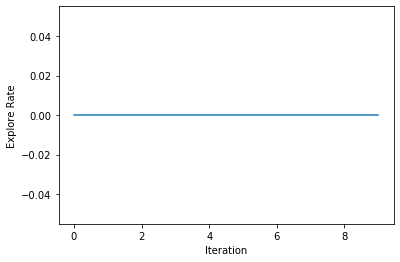

In [16]:
first_test = get_best_explore(0, 10, 0.1)

### Second test gets explore rate from 0 to 20 in steps of 2 (Result of 0.0)

iteration: 0
Explore Rate: 0.0 Time: 7.074521700000105
Explore Rate: 2.0 Time: 11.560292300000128
Explore Rate: 4.0 Time: 11.626852099999951
Explore Rate: 6.0 Time: 11.66746379999995
Explore Rate: 8.0 Time: 11.53829420000011
Explore Rate: 10.0 Time: 11.701911800000062
Explore Rate: 12.0 Time: 11.60296829999993
Explore Rate: 14.0 Time: 11.596818700000085
Explore Rate: 16.0 Time: 11.693698199999972
Explore Rate: 18.0 Time: 11.615774200000033
Explore Rate: 20.0 Time: 11.564654100000098
Explore Rate: 0.0
Time: 7.074521700000105

iteration: 1
Explore Rate: 0.0 Time: 6.5060015000001385
Explore Rate: 2.0 Time: 11.72094160000006
Explore Rate: 4.0 Time: 11.575966200000039
Explore Rate: 6.0 Time: 11.565158300000121
Explore Rate: 8.0 Time: 11.530217099999845
Explore Rate: 10.0 Time: 11.440771899999845
Explore Rate: 12.0 Time: 11.4805601999999
Explore Rate: 14.0 Time: 11.873522999999977
Explore Rate: 16.0 Time: 11.534811199999922
Explore Rate: 18.0 Time: 11.441682799999853
Explore Rate: 20.0 Time:

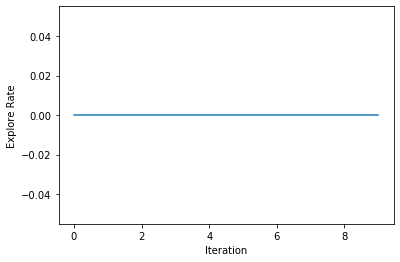

In [17]:
second_test = get_best_explore(0,21,1,2)

### Third test gets explore rate from 0 to 1 in steps of 0.1 (Result of 0.2)

iteration: 0
Explore Rate: 0.0 Time: 7.123591300000044
Explore Rate: 0.1 Time: 5.671173200000339
Explore Rate: 0.2 Time: 5.877681200000097
Explore Rate: 0.3 Time: 5.9543776000000435
Explore Rate: 0.4 Time: 6.57355729999972
Explore Rate: 0.5 Time: 7.1657963999996355
Explore Rate: 0.6 Time: 8.089681299999938
Explore Rate: 0.7 Time: 8.911644099999648
Explore Rate: 0.8 Time: 9.832917299999735
Explore Rate: 0.9 Time: 10.89970829999993
Explore Rate: 0.1
Time: 5.671173200000339

iteration: 1
Explore Rate: 0.0 Time: 6.666716400000041
Explore Rate: 0.1 Time: 5.731817500000034
Explore Rate: 0.2 Time: 5.62490409999964
Explore Rate: 0.3 Time: 6.042112399999951
Explore Rate: 0.4 Time: 6.579499399999804
Explore Rate: 0.5 Time: 7.236279700000068
Explore Rate: 0.6 Time: 8.1462918000002
Explore Rate: 0.7 Time: 8.893302399999811
Explore Rate: 0.8 Time: 9.893068300000323
Explore Rate: 0.9 Time: 11.068043400000079
Explore Rate: 0.2
Time: 5.62490409999964

iteration: 2
Explore Rate: 0.0 Time: 6.71370590000

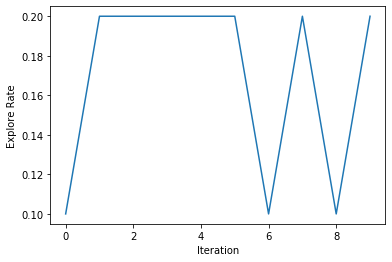

In [18]:
third_test = get_best_explore(0,10, 10)

## Conclusion: Best Explore Rate = 0.2

## Population Tests, cannot be 0, must be integer value > 1

In [19]:
def test_population(range_start, range_end, range_steps = 1):
    best_explore_rate = 100000
    best_time = 100.00
    for current_population in range(range_start, range_end, range_steps):
        pars.number_in_population = current_population
        current_time = test_genetic(100, prob, pars, 0.00001)
        if(current_time < best_time):
            best_population = current_population
            best_time = current_time
        print("Population: {} Time: {}".format(current_population, current_time))
        pars.number_in_population = 50
    return best_population, best_time

In [20]:
def get_best_population(range_start, range_end, range_steps = 1, number_of_iterations = 10):
    times_for_population = []
    populations = []
    for i in range(number_of_iterations):
        print("iteration: {}".format(i))
        current_population, current_time = test_population(range_start, range_end, range_steps)
        populations.append(current_population)
        times_for_population.append(current_time)
        print("Population: {}".format(current_population))
        print("Time: {}".format(times_for_population[i]))
        print()
    plt.plot(populations)
    plt.xlabel("Iteration")
    plt.ylabel("Population")

### First Test gets population from 100 to 1000 in steps of 100 (Result of 100 ) 

iteration: 0
Population: 100 Time: 9.383449500000097
Population: 200 Time: 12.106922699999814
Population: 300 Time: 12.347464200000104
Population: 400 Time: 12.278927600000316
Population: 500 Time: 12.577407199999925
Population: 600 Time: 12.767098699999679
Population: 700 Time: 13.013212500000009
Population: 800 Time: 13.070423699999992
Population: 900 Time: 13.303224300000238
Population: 100
Time: 9.383449500000097

iteration: 1
Population: 100 Time: 9.265933300000142
Population: 200 Time: 11.928627699999652
Population: 300 Time: 12.247078999999758
Population: 400 Time: 12.46907370000008
Population: 500 Time: 12.671583199999986
Population: 600 Time: 12.897187699999904
Population: 700 Time: 12.884968299999855
Population: 800 Time: 13.088854500000252
Population: 900 Time: 13.469302599999992
Population: 100
Time: 9.265933300000142

iteration: 2
Population: 100 Time: 9.233605499999612
Population: 200 Time: 11.926859199999853
Population: 300 Time: 13.25942380000015
Population: 400 Time: 1

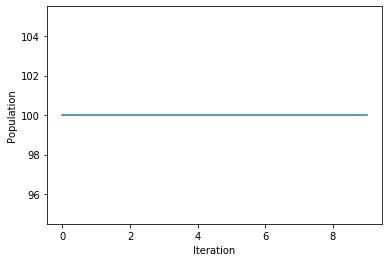

In [21]:
first_test = get_best_population(100,1000, 100)

### Second Test gets population from 10 to 100 in steps of 10 (Result of 20)

iteration: 0
Population: 10 Time: 4.185054499999751
Population: 20 Time: 4.45078790000025
Population: 30 Time: 4.732436199999938
Population: 40 Time: 5.290430500000184
Population: 50 Time: 5.998557299999447
Population: 60 Time: 6.572943300000588
Population: 70 Time: 7.5196086999994805
Population: 80 Time: 8.255050599999777
Population: 90 Time: 8.835497300000497
Population: 10
Time: 4.185054499999751

iteration: 1
Population: 10 Time: 4.150146500000119
Population: 20 Time: 4.171415199999501
Population: 30 Time: 4.56765009999981
Population: 40 Time: 5.245282400000178
Population: 50 Time: 5.986477000000377
Population: 60 Time: 6.570779199999379
Population: 70 Time: 7.50692810000055
Population: 80 Time: 8.129129699999794
Population: 90 Time: 8.800759099999595
Population: 10
Time: 4.150146500000119

iteration: 2
Population: 10 Time: 4.555738600000041
Population: 20 Time: 4.255084000000352
Population: 30 Time: 4.91857870000058
Population: 40 Time: 5.456144299999323
Population: 50 Time: 5.999

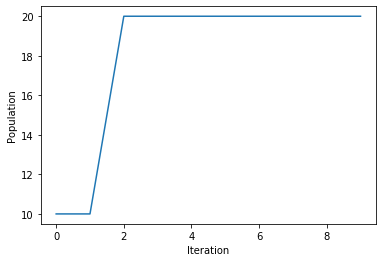

In [22]:
second_test = get_best_population(10, 100, 10)

### Third Test gets population from 10 to 30 in steps of 1 (result inconclusive as times too close, going with lowest time of 3.9... population 15 from iteration 5)

iteration: 0
Population: 10 Time: 4.9100539999999455
Population: 11 Time: 4.872104099999888
Population: 12 Time: 4.406386499999826
Population: 13 Time: 4.5383670999999595
Population: 14 Time: 4.788832999999613
Population: 15 Time: 4.624638000000232
Population: 16 Time: 4.355921899999885
Population: 17 Time: 3.9616498000004867
Population: 18 Time: 4.574174899999889
Population: 19 Time: 4.160519600000043
Population: 20 Time: 4.547983100000238
Population: 21 Time: 4.306467200000043
Population: 22 Time: 4.667203900000459
Population: 23 Time: 4.530163200000061
Population: 24 Time: 4.604454400000577
Population: 25 Time: 4.597459199999321
Population: 26 Time: 4.48994920000041
Population: 27 Time: 4.600741000000198
Population: 28 Time: 4.564642800000001
Population: 29 Time: 4.680674299999737
Population: 17
Time: 3.9616498000004867

iteration: 1
Population: 10 Time: 4.673242599999867
Population: 11 Time: 4.459175799999684
Population: 12 Time: 4.237772199999199
Population: 13 Time: 4.41926640000

Population: 28 Time: 4.628474899999674
Population: 29 Time: 4.836276399999406
Population: 16
Time: 4.00919039999917



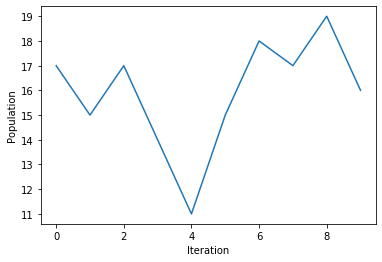

In [23]:
third_test = get_best_population(10,30)

## Conclusion: result of 20

## Child rate Tests

In [24]:
def test_child_rate(range_start, range_end, child_rate_range = 1, range_steps = 1):
    best_child_rate = 100000
    best_time = 100.00
    for i in range(range_start, range_end, range_steps):
        current_child_rate = float(i)/float(child_rate_range)
        pars.child_rate = current_child_rate
        current_time = test_genetic(100, prob, pars, 0.00001)
        if(current_time < best_time):
            best_child_rate = current_child_rate
            best_time = current_time
        print("Child Rate: {} Time: {}".format(current_child_rate, current_time))
        pars.child_rate = 1
    return best_child_rate, best_time

In [25]:
def get_best_child_rate(range_start, range_end, child_rate_range = 1, range_steps = 1, number_of_iterations = 10):
    times_for_child_rate = []
    child_rates = []
    for i in range(number_of_iterations):
        print("iteration: {}".format(i))
        current_child_rate, current_time = test_child_rate(range_start, range_end, child_rate_range, range_steps)
        child_rates.append(current_child_rate)
        times_for_child_rate.append(current_time)
        print("Child Rate: {}".format(current_child_rate))
        print("Time: {}".format(times_for_child_rate[i]))
        print()
    plt.plot(child_rates)
    plt.xlabel("Iteration")
    plt.ylabel("Child Rate")

### First Test gets child rate from 10 to 100 in steps of 10 (result inconclusive as times too close)

iteration: 0
Child Rate: 10.0 Time: 6.101678300000458
Child Rate: 20.0 Time: 6.180852800000139
Child Rate: 30.0 Time: 6.1272540999998455
Child Rate: 40.0 Time: 6.216386400000374
Child Rate: 50.0 Time: 6.023597700000209
Child Rate: 60.0 Time: 5.956856699999662
Child Rate: 70.0 Time: 6.276721600000201
Child Rate: 80.0 Time: 6.090431000000535
Child Rate: 90.0 Time: 6.129926999999952
Child Rate: 60.0
Time: 5.956856699999662

iteration: 1
Child Rate: 10.0 Time: 6.184080699999868
Child Rate: 20.0 Time: 6.056779200000165
Child Rate: 30.0 Time: 6.295319400000153
Child Rate: 40.0 Time: 6.235667899999498
Child Rate: 50.0 Time: 6.289693200000329
Child Rate: 60.0 Time: 6.102137099999709
Child Rate: 70.0 Time: 6.297413199999937
Child Rate: 80.0 Time: 6.306211300000541
Child Rate: 90.0 Time: 6.264344499999424
Child Rate: 20.0
Time: 6.056779200000165

iteration: 2
Child Rate: 10.0 Time: 6.135354099999859
Child Rate: 20.0 Time: 6.047176600000057
Child Rate: 30.0 Time: 6.066720200000418
Child Rate: 40.

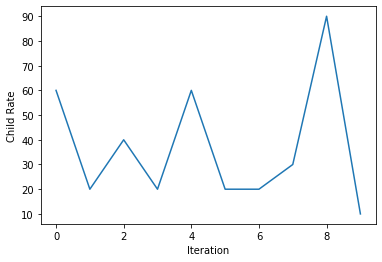

In [26]:
first_test = get_best_child_rate(1,10, 0.1)

### Second Test gets child rate from 1 to 10 (result inconclusive as times too close)

iteration: 0
Child Rate: 1.0 Time: 5.885074099999656
Child Rate: 2.0 Time: 6.018213999999716
Child Rate: 3.0 Time: 5.856300599999486
Child Rate: 4.0 Time: 5.9534809000006135
Child Rate: 5.0 Time: 5.98942580000039
Child Rate: 6.0 Time: 6.093044600000212
Child Rate: 7.0 Time: 6.029142299999876
Child Rate: 8.0 Time: 6.188174999999319
Child Rate: 9.0 Time: 5.858520900000258
Child Rate: 3.0
Time: 5.856300599999486

iteration: 1
Child Rate: 1.0 Time: 5.945998299999701
Child Rate: 2.0 Time: 5.979829400000199
Child Rate: 3.0 Time: 5.9572978000005605
Child Rate: 4.0 Time: 5.873155199999928
Child Rate: 5.0 Time: 6.070091600000524
Child Rate: 6.0 Time: 6.007783600000039
Child Rate: 7.0 Time: 6.026633000000402
Child Rate: 8.0 Time: 6.044486300000244
Child Rate: 9.0 Time: 5.883979299999737
Child Rate: 4.0
Time: 5.873155199999928

iteration: 2
Child Rate: 1.0 Time: 5.904355499999838
Child Rate: 2.0 Time: 5.924083300000348
Child Rate: 3.0 Time: 5.884909400000652
Child Rate: 4.0 Time: 5.92054579999967

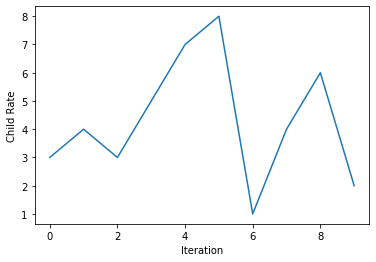

In [27]:
second_test = get_best_child_rate(1,10)

### Third Test gets child rate from 0 to 10 in steps of 0.1 (result inconclusive as times too close)

iteration: 0
Child Rate: 0.1 Time: 5.96877559999939
Child Rate: 0.2 Time: 6.129581599999256
Child Rate: 0.3 Time: 6.055651799999396
Child Rate: 0.4 Time: 5.831498300000021
Child Rate: 0.5 Time: 5.890365899999779
Child Rate: 0.6 Time: 5.999416000000565
Child Rate: 0.7 Time: 6.012404399999468
Child Rate: 0.8 Time: 5.811773700000231
Child Rate: 0.9 Time: 5.963145099999565
Child Rate: 0.8
Time: 5.811773700000231

iteration: 1
Child Rate: 0.1 Time: 5.799332499999764
Child Rate: 0.2 Time: 6.01769510000031
Child Rate: 0.3 Time: 5.97174509999968
Child Rate: 0.4 Time: 5.875237600000219
Child Rate: 0.5 Time: 5.7754546000005575
Child Rate: 0.6 Time: 5.78823680000005
Child Rate: 0.7 Time: 5.832556599999407
Child Rate: 0.8 Time: 5.789728300000206
Child Rate: 0.9 Time: 5.796174500000234
Child Rate: 0.5
Time: 5.7754546000005575

iteration: 2
Child Rate: 0.1 Time: 5.822958899999321
Child Rate: 0.2 Time: 5.792322900000727
Child Rate: 0.3 Time: 5.961106499999914
Child Rate: 0.4 Time: 5.913678399999299
C

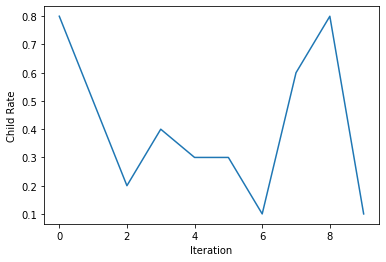

In [28]:
third_test = get_best_child_rate(1,10, 10)

## Conclusion: deeming 0.5 as best child rate as time is lowest

## Number of iteration tests, cannot be 0, must be integer

In [29]:
def test_number_of_iterations(range_start, range_end, range_steps = 1):
    best_number_of_iterations = 100000
    best_time = 100.00
    for current_number_of_iterations in range(range_start, range_end, range_steps):
        pars.number_of_iterations = current_number_of_iterations
        current_time = test_genetic(100, prob, pars, 0.00001)
        if(current_time < best_time):
            best_number_of_iterations = current_number_of_iterations
            best_time = current_time
        print("Number of Iterations: {} Time: {}".format(current_number_of_iterations, current_time))
        pars.number_of_iterations = 100
    return best_number_of_iterations, best_time

In [30]:
def get_best_number_of_iterations(range_start, range_end, range_steps = 1, iteration_count = 10):
    times_for_number_of_iterations = []
    numbers_of_iterations = []
    for i in range(iteration_count):
        print("iteration: {}".format(i))
        current_number_of_iterations, current_time = test_number_of_iterations(range_start, range_end, range_steps)
        numbers_of_iterations.append(current_number_of_iterations)
        times_for_number_of_iterations.append(current_time)
        print("Number of Iterations: {}".format(current_number_of_iterations))
        print("Time: {}".format(times_for_number_of_iterations[i]))
        print()
    plt.plot(numbers_of_iterations)
    plt.xlabel("Iteration")
    plt.ylabel("Number of Iterations")

### First Test gets range of 100 to 1000 number of iterations in steps of 100 (result shows > 100 time is similar)

iteration: 0
Number of Iterations: 100 Time: 6.000000500000169
Number of Iterations: 200 Time: 5.948072199999842
Number of Iterations: 300 Time: 5.848948500000006
Number of Iterations: 400 Time: 6.019306600000164
Number of Iterations: 500 Time: 5.993973600000572
Number of Iterations: 600 Time: 5.819903200000226
Number of Iterations: 700 Time: 5.956938499999524
Number of Iterations: 800 Time: 6.0853068000005806
Number of Iterations: 900 Time: 5.945822899999257
Number of Iterations: 600
Time: 5.819903200000226

iteration: 1
Number of Iterations: 100 Time: 5.980646099999831
Number of Iterations: 200 Time: 5.986283499999445
Number of Iterations: 300 Time: 5.907329800000298
Number of Iterations: 400 Time: 6.028917900000124
Number of Iterations: 500 Time: 5.917347999999947
Number of Iterations: 600 Time: 6.056469499999366
Number of Iterations: 700 Time: 6.258787499999926
Number of Iterations: 800 Time: 6.055640000000494
Number of Iterations: 900 Time: 6.133257499999672
Number of Iterations: 

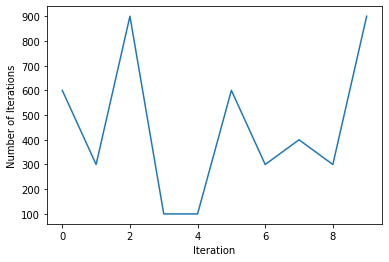

In [31]:
first_test = get_best_number_of_iterations(100,1000, 100)

### Second Test gets range of 10 to 100 number of iterations in steps of 10 ( shows 60 is minimum accurate value)

iteration: 0
Number of Iterations: 10 Time: 1.2434976000004099
Number of Iterations: 20 Time: 2.549139599999762
Number of Iterations: 30 Time: 3.5985949999994773
Number of Iterations: 40 Time: 4.726319399999738
Number of Iterations: 50 Time: 5.671411000000262
Number of Iterations: 60 Time: 6.108760499999335
Number of Iterations: 70 Time: 5.961150000000089
Number of Iterations: 80 Time: 6.030409300000429
Number of Iterations: 90 Time: 6.085507799999505
Number of Iterations: 10
Time: 1.2434976000004099

iteration: 1
Number of Iterations: 10 Time: 1.209459899999274
Number of Iterations: 20 Time: 2.373234699999557
Number of Iterations: 30 Time: 3.5174956000000748
Number of Iterations: 40 Time: 4.684737300000052
Number of Iterations: 50 Time: 5.760191899999882
Number of Iterations: 60 Time: 5.846775200000593
Number of Iterations: 70 Time: 5.996197000000393
Number of Iterations: 80 Time: 5.877102200000081
Number of Iterations: 90 Time: 5.872099799999887
Number of Iterations: 10
Time: 1.20945

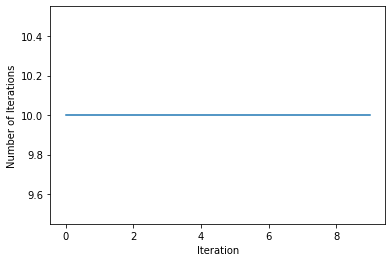

In [32]:
second_test = get_best_number_of_iterations(10,100, 10)

### Third Test gets range of 60 to 100 number of iterations in steps of 10 ( proves above hypothesis)

iteration: 0
Number of Iterations: 60 Time: 5.979452499999752
Number of Iterations: 70 Time: 5.925007900001219
Number of Iterations: 80 Time: 6.0370160000002215
Number of Iterations: 90 Time: 6.059929799999736
Number of Iterations: 70
Time: 5.925007900001219

iteration: 1
Number of Iterations: 60 Time: 5.888566899999205
Number of Iterations: 70 Time: 5.991091399999277
Number of Iterations: 80 Time: 5.966584100000546
Number of Iterations: 90 Time: 5.9030106000009255
Number of Iterations: 60
Time: 5.888566899999205

iteration: 2
Number of Iterations: 60 Time: 5.878902400001607
Number of Iterations: 70 Time: 5.90659549999873
Number of Iterations: 80 Time: 6.042778299999554
Number of Iterations: 90 Time: 5.810731199999282
Number of Iterations: 90
Time: 5.810731199999282

iteration: 3
Number of Iterations: 60 Time: 6.056082600000082
Number of Iterations: 70 Time: 6.013580599999841
Number of Iterations: 80 Time: 5.906089500000235
Number of Iterations: 90 Time: 5.944020299999465
Number of Ite

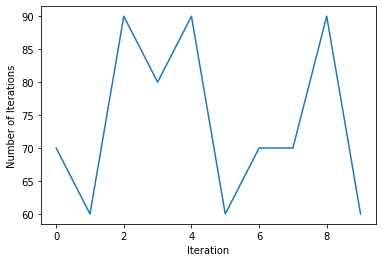

In [33]:
third_test = get_best_number_of_iterations(60,100, 10)

## Conclusion: 60 is minimum number of iterations

## Mutation rate tests

In [34]:
def test_mutation_rate(range_start, range_end, mutation_rate_range = 1, range_steps = 1):
    best_mutation_rate = 100000
    best_time = 100.00
    for i in range(range_start, range_end, range_steps):
        current_mutation_rate = float(i)/float(mutation_rate_range)
        pars.mutation_rate = current_mutation_rate
        current_time = test_genetic(100, prob, pars, 0.00001)
        if(current_time < best_time):
            best_mutation_rate = current_mutation_rate
            best_time = current_time
        print("Mutation Rate: {} Time: {}".format(current_mutation_rate, current_time))
        pars.mutation_rate = 0.2
    return best_mutation_rate, best_time

In [35]:
def get_best_mutation_rate(range_start, range_end, mutation_rate_range = 1, range_steps = 1, number_of_iterations = 10):
    times_for_mutation_rate = []
    mutation_rates = []
    for i in range(number_of_iterations):
        print("iteration: {}".format(i))
        current_mutation_rate, current_time = test_mutation_rate(range_start, range_end, mutation_rate_range, range_steps)
        mutation_rates.append(current_mutation_rate)
        times_for_mutation_rate.append(current_time)
        print("Mutation Rate: {}".format(current_mutation_rate))
        print("Time: {}".format(times_for_mutation_rate[i]))
        print()
    plt.plot(mutation_rates)
    plt.xlabel("Iteration")
    plt.ylabel("Mutation Rate")

### First Test

iteration: 0
Mutation Rate: 10.0 Time: 13.232706099999632
Mutation Rate: 20.0 Time: 13.234609299999647
Mutation Rate: 30.0 Time: 13.395362600000226
Mutation Rate: 40.0 Time: 13.204973699999755
Mutation Rate: 50.0 Time: 13.230171200000768
Mutation Rate: 60.0 Time: 13.267329599999357
Mutation Rate: 70.0 Time: 13.222559400001046
Mutation Rate: 80.0 Time: 13.20972140000049
Mutation Rate: 90.0 Time: 13.189399900000353
Mutation Rate: 90.0
Time: 13.189399900000353

iteration: 1
Mutation Rate: 10.0 Time: 13.21347699999933
Mutation Rate: 20.0 Time: 13.186624899999515
Mutation Rate: 30.0 Time: 13.164373699999487
Mutation Rate: 40.0 Time: 13.309306099999958
Mutation Rate: 50.0 Time: 13.319544300000416
Mutation Rate: 60.0 Time: 13.264542200000506
Mutation Rate: 70.0 Time: 13.442486199999621
Mutation Rate: 80.0 Time: 13.296978200000012
Mutation Rate: 90.0 Time: 13.286428199999136
Mutation Rate: 30.0
Time: 13.164373699999487

iteration: 2
Mutation Rate: 10.0 Time: 13.264048299999558
Mutation Rate: 2

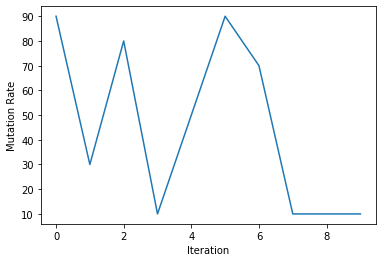

In [36]:
first_test = get_best_mutation_rate(1,10, 0.1)

### Second Test

iteration: 0
Mutation Rate: 1.0 Time: 13.682794500000455
Mutation Rate: 2.0 Time: 13.61609800000042
Mutation Rate: 3.0 Time: 13.70809299999928
Mutation Rate: 4.0 Time: 13.701997900001516
Mutation Rate: 5.0 Time: 13.562126499999067
Mutation Rate: 6.0 Time: 13.461311699998987
Mutation Rate: 7.0 Time: 13.583125799999834
Mutation Rate: 8.0 Time: 13.667854100000113
Mutation Rate: 9.0 Time: 13.558680999998614
Mutation Rate: 6.0
Time: 13.461311699998987

iteration: 1
Mutation Rate: 1.0 Time: 13.640864700000748
Mutation Rate: 2.0 Time: 13.766968600000837
Mutation Rate: 3.0 Time: 13.738370799999757
Mutation Rate: 4.0 Time: 13.697401499999614
Mutation Rate: 5.0 Time: 13.664996200001042
Mutation Rate: 6.0 Time: 13.667849999999817
Mutation Rate: 7.0 Time: 13.634348199999295
Mutation Rate: 8.0 Time: 13.5860646000001
Mutation Rate: 9.0 Time: 13.544969500000661
Mutation Rate: 9.0
Time: 13.544969500000661

iteration: 2
Mutation Rate: 1.0 Time: 13.556821199999831
Mutation Rate: 2.0 Time: 13.32076439999

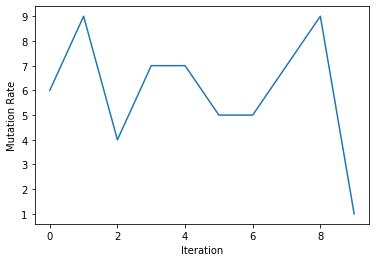

In [37]:
second_test = get_best_mutation_rate(1,10)

### Third Test

iteration: 0
Mutation Rate: 0.1 Time: 4.763318199999048
Mutation Rate: 0.2 Time: 6.015340300000389
Mutation Rate: 0.3 Time: 8.22195180000017
Mutation Rate: 0.4 Time: 11.779040200000964
Mutation Rate: 0.5 Time: 12.368084100000488
Mutation Rate: 0.6 Time: 12.546390299999985
Mutation Rate: 0.7 Time: 12.696578900000532
Mutation Rate: 0.8 Time: 12.90706019999925
Mutation Rate: 0.9 Time: 13.389610100000937
Mutation Rate: 0.1
Time: 4.763318199999048

iteration: 1
Mutation Rate: 0.1 Time: 4.786396900000909
Mutation Rate: 0.2 Time: 6.207644799998889
Mutation Rate: 0.3 Time: 8.338209899999129
Mutation Rate: 0.4 Time: 11.988520400000198
Mutation Rate: 0.5 Time: 12.576801199998954
Mutation Rate: 0.6 Time: 12.753624599999966
Mutation Rate: 0.7 Time: 13.10616409999966
Mutation Rate: 0.8 Time: 13.085926400000972
Mutation Rate: 0.9 Time: 13.58560529999886
Mutation Rate: 0.1
Time: 4.786396900000909

iteration: 2
Mutation Rate: 0.1 Time: 4.914647899999181
Mutation Rate: 0.2 Time: 6.068144799999573
Mutat

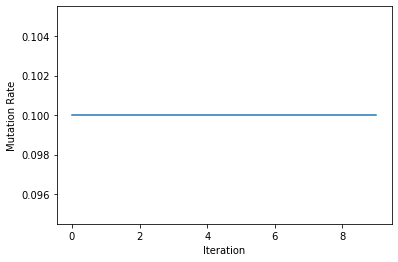

In [38]:
first_test = get_best_mutation_rate(1,10, 10)

## Conclusion: 0.1 is best mutation rate

## Mutation range tests

In [39]:
def test_mutation_range(range_start, range_end, mutation_range_range = 1, range_steps = 1):
    best_mutation_range = 100000
    best_time = 100.00
    for i in range(range_start, range_end, range_steps):
        current_mutation_range = float(i)/float(mutation_range_range)
        pars.mutation_range = current_mutation_range
        current_time = test_genetic(100, prob, pars, 0.00001)
        if(current_time < best_time):
            best_mutation_range = current_mutation_range
            best_time = current_time
        print("Mutation Range: {} Time: {}".format(current_mutation_range, current_time))
        pars.mutation_range = 0.2
    return best_mutation_range, best_time

In [40]:
def get_best_mutation_range(range_start, range_end, mutation_range_range = 1, range_steps = 1, number_of_iterations = 10):
    times_for_mutation_range = []
    mutation_ranges = []
    for i in range(number_of_iterations):
        print("iteration: {}".format(i))
        current_mutation_range, current_time = test_mutation_range(range_start, range_end, mutation_range_range, range_steps)
        mutation_ranges.append(current_mutation_range)
        times_for_mutation_range.append(current_time)
        print("Mutation Range: {}".format(current_mutation_range))
        print("Time: {}".format(times_for_mutation_range[i]))
        print()
    plt.plot(mutation_ranges)
    plt.xlabel("Iteration")
    plt.ylabel("Mutation Range")

### First Test

iteration: 0
Mutation Range: 10.0 Time: 10.405170500000168
Mutation Range: 20.0 Time: 10.736514399999578
Mutation Range: 30.0 Time: 10.871374199999991
Mutation Range: 40.0 Time: 10.79497640000045
Mutation Range: 50.0 Time: 11.00162730000011
Mutation Range: 60.0 Time: 10.822514100000262
Mutation Range: 70.0 Time: 10.832824699999037
Mutation Range: 80.0 Time: 10.91485399999874
Mutation Range: 90.0 Time: 10.99819750000097
Mutation Range: 10.0
Time: 10.405170500000168

iteration: 1
Mutation Range: 10.0 Time: 10.475399900000411
Mutation Range: 20.0 Time: 10.616389500000878
Mutation Range: 30.0 Time: 10.677579100000003
Mutation Range: 40.0 Time: 10.86666409999998
Mutation Range: 50.0 Time: 10.987056300000404
Mutation Range: 60.0 Time: 10.883569100000386
Mutation Range: 70.0 Time: 10.779409000000669
Mutation Range: 80.0 Time: 10.986190800000259
Mutation Range: 90.0 Time: 10.9021546999993
Mutation Range: 10.0
Time: 10.475399900000411

iteration: 2
Mutation Range: 10.0 Time: 10.0213461000003
Mu

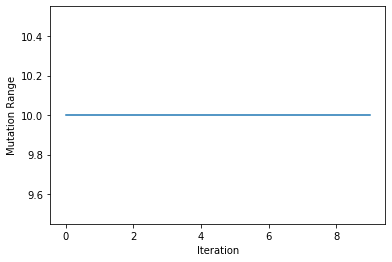

In [41]:
first_test = get_best_mutation_range(1,10, 0.1)

### Second Test

iteration: 0
Mutation Range: 1.0 Time: 7.549501899999086
Mutation Range: 2.0 Time: 8.603444800000943
Mutation Range: 3.0 Time: 8.77916069999992
Mutation Range: 4.0 Time: 9.340075899999647
Mutation Range: 5.0 Time: 9.94175179999911
Mutation Range: 6.0 Time: 9.661516599999231
Mutation Range: 7.0 Time: 9.871455200000128
Mutation Range: 8.0 Time: 9.876712499999485
Mutation Range: 9.0 Time: 9.816719299999022
Mutation Range: 1.0
Time: 7.549501899999086

iteration: 1
Mutation Range: 1.0 Time: 7.440687099999195
Mutation Range: 2.0 Time: 8.550772999999026
Mutation Range: 3.0 Time: 9.003837399999611
Mutation Range: 4.0 Time: 9.173580899998342
Mutation Range: 5.0 Time: 9.46302629999991
Mutation Range: 6.0 Time: 9.8970862999995
Mutation Range: 7.0 Time: 9.537824899998668
Mutation Range: 8.0 Time: 9.92338589999963
Mutation Range: 9.0 Time: 9.77172100000098
Mutation Range: 1.0
Time: 7.440687099999195

iteration: 2
Mutation Range: 1.0 Time: 7.50515649999943
Mutation Range: 2.0 Time: 8.432893400000466

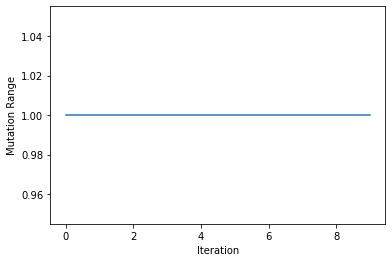

In [42]:
second_test = get_best_mutation_range(1,10)

### Third Test

iteration: 0
Mutation Range: 0.1 Time: 5.586434599999848
Mutation Range: 0.2 Time: 6.086349000001064
Mutation Range: 0.3 Time: 6.406741999999213
Mutation Range: 0.4 Time: 6.737675300000774
Mutation Range: 0.5 Time: 7.150877399999445
Mutation Range: 0.6 Time: 7.113259700001436
Mutation Range: 0.7 Time: 7.333249299999807
Mutation Range: 0.8 Time: 7.566656700000749
Mutation Range: 0.9 Time: 7.622911000000386
Mutation Range: 0.1
Time: 5.586434599999848

iteration: 1
Mutation Range: 0.1 Time: 5.613605300000927
Mutation Range: 0.2 Time: 6.266242100000454
Mutation Range: 0.3 Time: 6.4702326000006
Mutation Range: 0.4 Time: 6.821406399998523
Mutation Range: 0.5 Time: 6.9868604999992385
Mutation Range: 0.6 Time: 7.247340500000064
Mutation Range: 0.7 Time: 7.438846900000499
Mutation Range: 0.8 Time: 7.376539300001241
Mutation Range: 0.9 Time: 7.460260599998946
Mutation Range: 0.1
Time: 5.613605300000927

iteration: 2
Mutation Range: 0.1 Time: 5.449015000000145
Mutation Range: 0.2 Time: 5.99937909

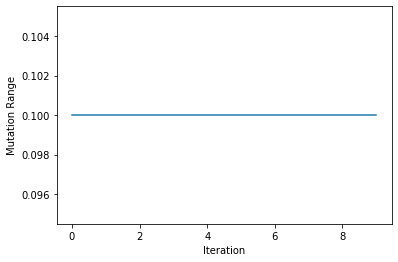

In [43]:
third_test = get_best_mutation_range(1,10, 10)

## Conclusion: 0.1 is best mutation range

In [50]:
pars.number_of_iterations = 60
pars.number_in_population = 15
pars.child_rate = 0.5
pars.explore_rate = 0.2
pars.mutation_rate = 0.1
pars.mutation_range = 0.1

In [54]:
final_test = test_genetic(100, prob, pars, 0.00001)

In [55]:
pars.to_String()

'Population: 15  Child Rate: 0.5  Explore Rate: 0.2  Mutation Rate: 0.1  Mutation Range: 0.1'

In [56]:
print(final_test)

3.888516899998649
